<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [2]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 
import os
import re

from functools import reduce
from collections import defaultdict 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'match_result_test.csv',
 'sample-sales-data.csv',
 'online_retail.xlsx',
 'test.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'sales_vs_discount.csv',
 'online_retail_II.xlsx',
 'groceries.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales.csv',
 'ecommerce-data.csv',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 '1_order_payments_dataset.csv',
 'mock_sales_data.csv',
 'sample_data']

In [15]:
df = pd.read_csv('groceries.csv')
df['sales_date'] = df['sales_date'].to_numpy().astype('datetime64[D]')
df['week'] = df['sales_date'] - df['sales_date'].dt.weekday.astype('timedelta64[D]')
df['rev'] = df.price * df.sales_quantity
df.head()

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit,week,rev
0,1001,tomato,vegetable,2021-11-01,2.99,36,kg,2021-11-01,107.64
1,1001,tomato,vegetable,2021-11-02,2.99,23,kg,2021-11-01,68.77
2,1001,tomato,vegetable,2021-11-03,2.99,34,kg,2021-11-01,101.66
3,1001,tomato,vegetable,2021-11-04,2.99,23,kg,2021-11-01,68.77
4,1001,tomato,vegetable,2021-11-05,2.99,34,kg,2021-11-01,101.66


In [14]:
df.iloc[:,0:3].value_counts().reset_index()

,product_code,product_description,product_group,0
0,1001,tomato,vegetable,30
1,1002,cucumber,vegetable,30
2,1003,onion,vegetable,30
3,1101,plum,fruit,30
4,1102,orange,fruit,30
5,1103,apple,fruit,30
6,1104,grape,fruit,30
7,1201,milk-1.5,dairy,30
8,1202,yogurt-1,dairy,30
9,1203,butter-0.25,dairy,30


In [18]:
cnt = df.groupby(['product_group', 'product_description', 'sales_date', 'week'])['rev', 'sales_quantity'].sum().reset_index()
cnt.columns = ['cat', 'product','date','week','rev','cnt']
cnt.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,cat,product,date,week,rev,cnt
0,dairy,butter-0.25,2021-11-01,2021-11-01,261.8,22
1,dairy,butter-0.25,2021-11-02,2021-11-01,404.6,34
2,dairy,butter-0.25,2021-11-03,2021-11-01,309.4,26
3,dairy,butter-0.25,2021-11-04,2021-11-01,464.1,39
4,dairy,butter-0.25,2021-11-05,2021-11-01,321.3,27


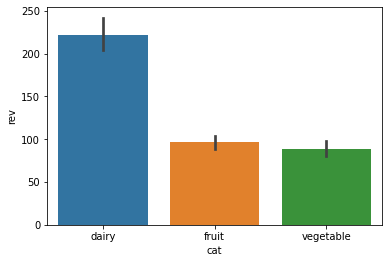

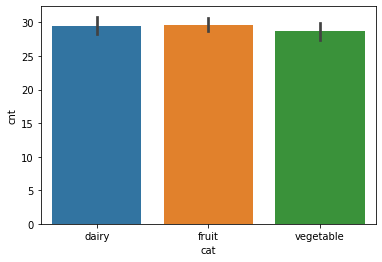

In [23]:
sns.barplot(data = cnt, x = 'cat', y = 'rev')
plt.show()
sns.barplot(data = cnt, x = 'cat', y = 'cnt')
plt.show()

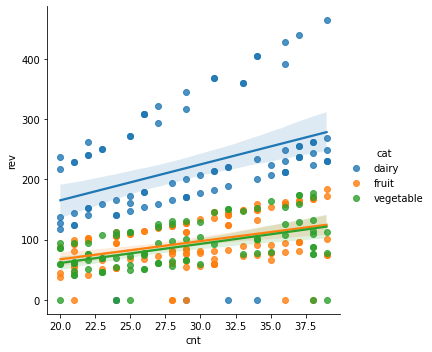

In [26]:
sns.lmplot(data = cnt, x = 'cnt', y = 'rev', hue = 'cat')

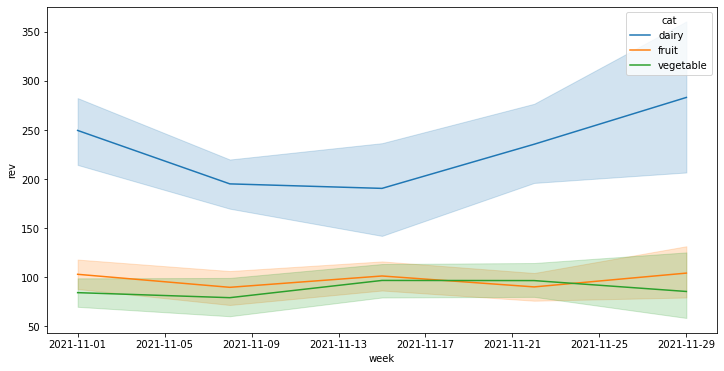

In [28]:
plt.figure(figsize = [12,6])
sns.lineplot(data = cnt, x = 'week', y = 'rev', hue = 'cat')

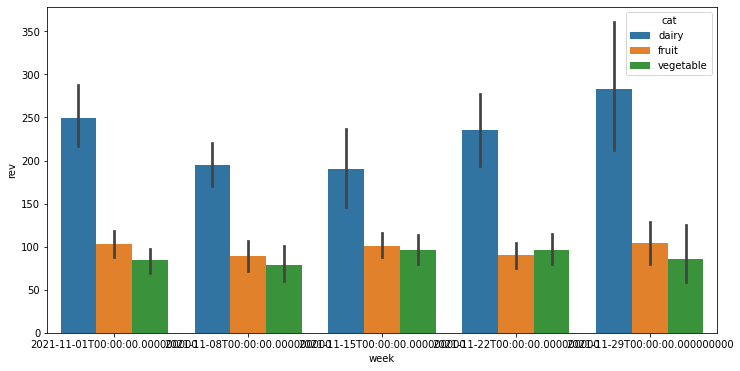

In [29]:
plt.figure(figsize = [12,6])
sns.barplot(data = cnt, x = 'week', y = 'rev', hue = 'cat')

# Iterator

In [30]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [36]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [37]:
reduce(lambda x, y : x + [y['age']], users, [])

[73, 29, 51, 32, 42]

In [38]:
reduce(lambda x, y : x + y['age'], users, 0)

227